# Big Brother's Cameras are here to stay 



The use of surveillance cameras by private businesses, as well as municipal governments is predicted to increase.  Recent police shootings of unarmed men have caused many municipalities to call for the use of body cameras to be mounted on police officers as they engage on their duties.  Harvard University recently came under fire for having conducted class-attendance research that involved the use of video cameras in lecture halls without student's knowledge or consent. Video surveillance “smart” cameras in operation in New York City have the ability to single out individuals based on colors they are wearing, let police know when a backpack was left behind by an individual, read thousands of license plates each second and check the scanned numbers against a database that saves the location where that vehicle has been scanned before. All of these cameras need to be programmed, manned, and any data collected by them needs to be stored for possible later retrieval that can be used in court cases, police investigations, and much more.  Database software will be needed to code the applications that deal with the storage of this data.  Real-time computer vision software will be needed in order to do the tracking, face recognition, object character recognition, recording, and so on. All of these requirements will continue to demand fast and efficient computer vision applications  to deal with these situations. 

The use of an interpreted language like python, with a reputation of being a lot slower than C/C++, brings a new set of challenges to cope with in order to produce fast executed code.  For this reason the question of how C/C++ code is called from python, is essential in the production of real-time computer vision applications. We will explore ways and techniques that have been used to accomplish this non-trivial endeavor, in addition to new approaches recently introduced that guarantee that the OpenCV - Python bindings take advantage of the latest optimization techniques. The OpenCV library is a good choice to meet many of these demands, and we will now explore it in great detail. 
OpenCV - Python is a library of Python bindings that allows us to execute computationally optimized code written in low-level languages, and called from easily readable python code thus increasing programming productivity and efficiency. This efficiency is achieved by writing portions of the code that are not detrimental to performance, in a high-level language, in our case the Python language. By doing this the developer is able to relegate the performance critical code portions of the program to a lower-level language, like Fortran, or C/C++. We will take a closer look at the relationship of the OpenCV Python bindings, wrappers, and how they work vis-a-vis the OpenCV API C/C++ interface in order to make this interoperability possible.  The Python bindings of OpenCV have changed over the years, and we will explore what kind of requirements made these changes necessary, and the additions that took their place.
In this chapter we will explore how OpenCV code originally written in low-level C/C++ can be called from higher-level python scripts and programs. We will: explore different             techniques by dealing with real examples that use these approaches.  In this chapter we
will: 					            
Learn how to use Swig to generate wrapper code
Learn how to bind and wrap C/C++ code and call it from a Python program     
Learn to use the Python C/API with OpenCV

Learn about other interface libraries that work well with OpenCV
Learn how to write and incorporate an Android application with the OpenCV libraries written in C/C++ and its python bindings 
In the next section we will cover some  concepts regarding the Python programming language and its bindings and how they interact with the main C and C++ code of the OpenCV library.
Introduction to the OpenCV - Python Bindings and Wrappers

The Python C/API is the cornerstone of the standard Python interpreter. By using this API it is possible to write Python extension modules written in C and C++, making it possible from these modules to call functions written in C or C++. In order to take advantage of the Python C/API, one has to follow its code guidelines and requirements, as well as parsing function procedures in order to produce the desired return type. This can be done manually, or you can take advantage of code generators and interface libraries. There are many choices and alternatives, too many to list, and I will only deal with the ones that have been used by OpenCV as part of its implementation.  
A simple example of SWIG in action 

In order to understand a little bit more about the OpenCV - Python bindings, it would be helpful, if not just for historical reasons, to see how OpenCV operated just a couple of versions ago.  I believe will help to give us an overall picture, and we can start to appreciate some of the changes that were made to it, and most importantly how they came about.  For this reason we will briefly take a look at the SWIG code generator. 
Some of these changes can easily be noticed if you happen to download an older version of OpenCV legacy code.  
When looking through the OpenCV version 1.0,  you will notice that inside of the main directory, there is a main directory with all the directories and files that you will need for building and compilation 

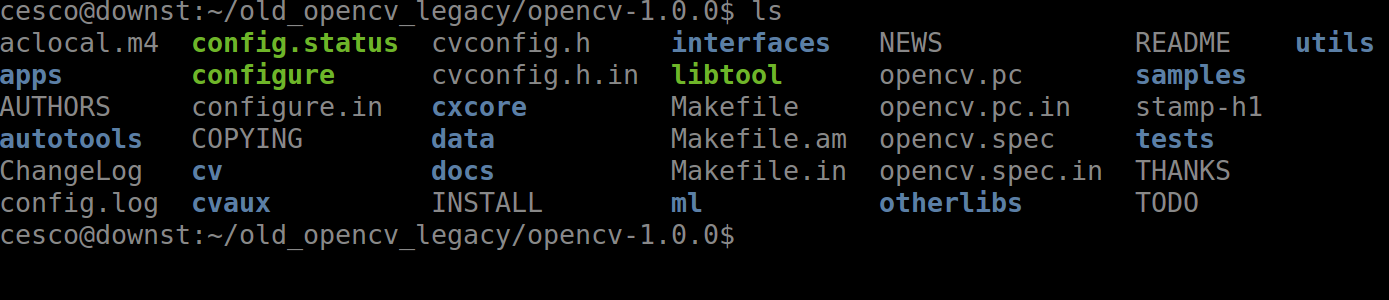

In [62]:
from IPython.display import Image
Image(filename='///home/cesco/Desktop/book_entirety/chapter1/images/B04209_01_01.png') 

there is an interfaces directory with a directory named SWIG inside of it.

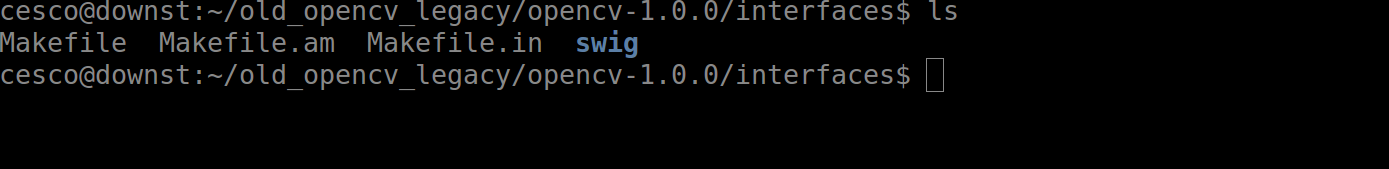

In [63]:
from IPython.display import Image
Image(filename='///home/cesco/Desktop/book_entirety/chapter1/images/B04209_01_02.png') 

Inside the SWIG directory you can find all the interfaces needed to serve as a bridge between low-level languages and Python.

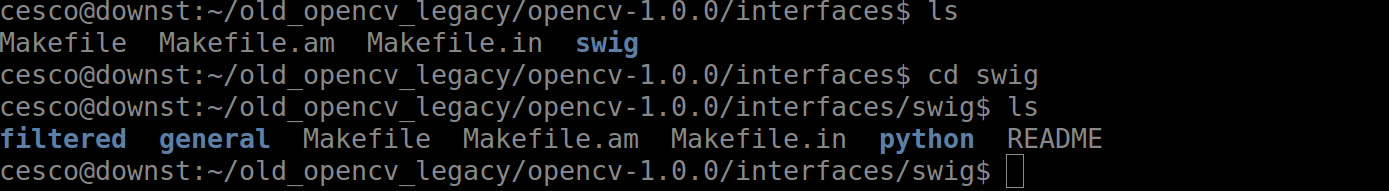

In [64]:
from IPython.display import Image
Image(filename='///home/cesco/Desktop/book_entirety/chapter1/images/B04209_01_03.png') 

You also find the general directory where more situation-specific interfaces and header files are located.


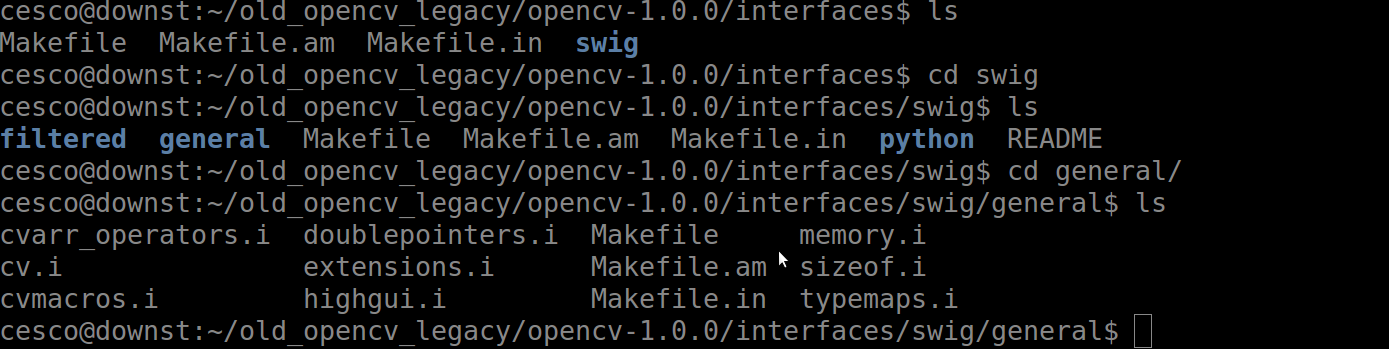

In [65]:
from IPython.display import Image
Image(filename='///home/cesco/Desktop/book_entirety/chapter1/images/B04209_01_04.png') 

Inside of the Python directory you notice that it includes all the header files that are needed for the generation of code that make the calls to low-level functions.  

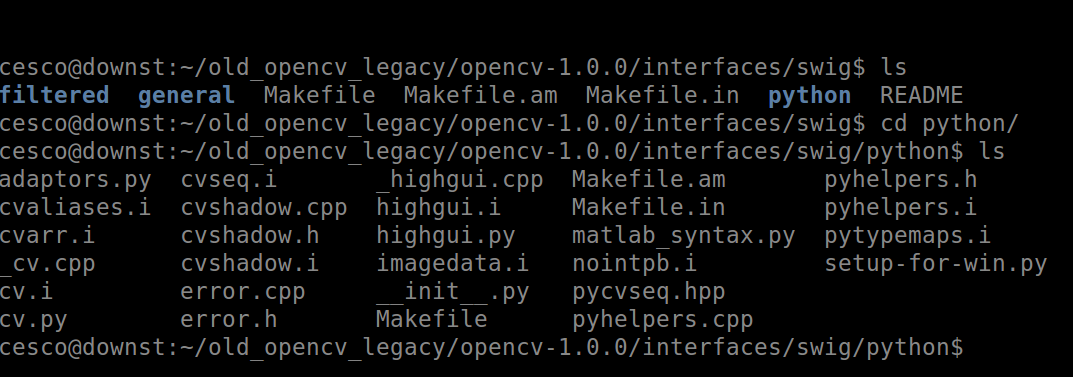

In [66]:
from IPython.display import Image
Image(filename='///home/cesco/Desktop/book_entirety/chapter1/images/B04209_01_05.png') 

Swig is a very powerful command-line tool and popular interface compiler that serves as a bridge between programs written in C/C++ and Python.  SWIG is also very popular as glue code for many other scripting languages.  It works by taking the declarations in .h header files and using them to generate wrapper code, code from where scripting languages can then access the underlying C / C++ code. SWIG is able to parse these declarations and creates an output file of C/C++ containing code. This produced code can then be compiled in a shared library to make your Python module that you can subsequently import from a Python interpreter. This was the way that earlier versions of OpenCV-Python first wrapped C/C++ code. OpenCV used SWIG as a code generator in order for Python to call low-level C and C++ code.  By generating code in this fashion, the OpenCV low-level C/C++ code was cleanly separated from its more “programmable” scripting interface written in Python.  
SWIG depends on the following components:

Preprocessor
Parser 
Features
Typemaps

For more information on the internals of swig, and more 	advanced uses 	visit their website:
		www.swig.org
        
In this next example we introduce a very simple hello_world program written in C++ that will illustrate and teach you how to use SWIG to generate Python code from where we can call the C/C++ underlying code.  This is a very simple example that emphasizes on breadth and not depth, taking into consideration the vast number of applications that can be performed using SWIG.  My intent is to simply expose you to this code generator, using a very simple technique, that can become very handy in building applications. 

If we use our favorite text editor we can imagine that our function lives in the file hello.cpp,         

//hello.cpp
#include <iostream> 
#include "hello.h" 
void sayHello() 
{ 
    std::cout << "Hello OpenCV!\n"; 
}


and the header file in the hello.h:

//hello.h
#ifndef HELLO 
#define HELLO 

    void sayHello(); 
 #endif    

and we are going to use the file main.cpp to call the function.

//main.cpp
#include "hello.h" 

int main() 
{ 
    sayHello(); 
    return 0; 
}

To summarize, we can see that in the code written in these programs, we are creating a very traditional 'hello world' program written in C++.   We are also including a header file, hello.h that contains the function to be called, and a main file, main.cpp from where we are going to call the function. 

We introduce three very important programs:

 setup.py script
 makefile script
 swigversion.i 

     
The setup.py program written in Python, allows us to take advantage of the disutils application that to build our extensions, modules, and build directories.  We also get to name our module, and the name of the source file that we will use to build our application.  

The swigversion.i program is the program that SWIG uses to produce the wrap code that serves as the interface to the C++ written code. In it we can include the module name and the libraries, header files, and any other necessary files that are needed for our application to run.  We also list everything else we want included in the extension module to be built.

//swigversion.i
%module swigversion 
%{ 
#include <stdlib.h> 
#include "hello.h" 
%} 
%include "hello.h"

The code in the Makefile file allows SWIG to seamlessly start linking our libraries, and most importantly deal with compatibility flags, and compiler issues.

//setup.py
from distutils.core import setup, Extension 

extension_mod = Extension("_swigversion", 
			["_swigversion_module.cpp", "hello.cpp"]) 
setup(name = "swigversion", ext_modules=[extension_mod])

//setup.py
from distutils.core import setup, Extension 

extension_mod = Extension("_swigversion", 
			["_swigversion_module.cpp", "hello.cpp"]) 
setup(name = "swigversion", ext_modules=[extension_mod])
python setup.py build_ext --inplace

So far we have constructed a micro environment with toy examples that mimic the tree structure of the OpenCV v. 1.0  that we went over in the last section. As you can see it contains a .cpp file, .h file, .i interface file, setup.py, Makefile, and Main file to carry the execution code to test our application.  We are now ready for building and compiling our application.
In order to run these set of programs, all you need to do is open a terminal in the same directory where these programs are located, and type  make.  

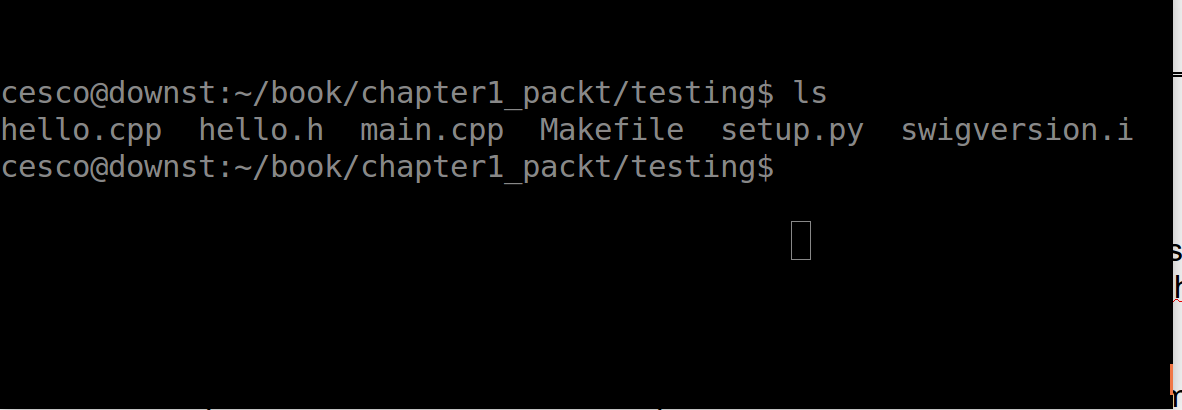

In [67]:
from IPython.display import Image
Image(filename='///home/cesco/Desktop/book_entirety/chapter1/images/B04209_01_06.png') 

shell$ make

By entering make into your terminal, you are calling the Makefile script 	to build and link the files in that directory. There is a lot going on under 	the hood, that SWIG keeps from the programmer. If you want to know 	some of these hidden details during the code generation process,  just 	enter the following command in a terminal: 

shell$ swig -E -pyhton -c++ hello.i

and you will see that a build directory has been created in addition to some files.  The build directory was made in accordance to our specifications given in the setup.py file with the following line :

python setup.py build_ext –inplace

nside the build directory we find a couple of object files the hello.o, and the   _swigversion_module.o , and outside of the build directory, the files  swigversion.pyc,  _swigversion_module.cpp,  _swigversion.so, and the swigversion.py. The generated .pyc swigversion.pyc file contains the compiled bytecode of the Python source files, as  you can see here:

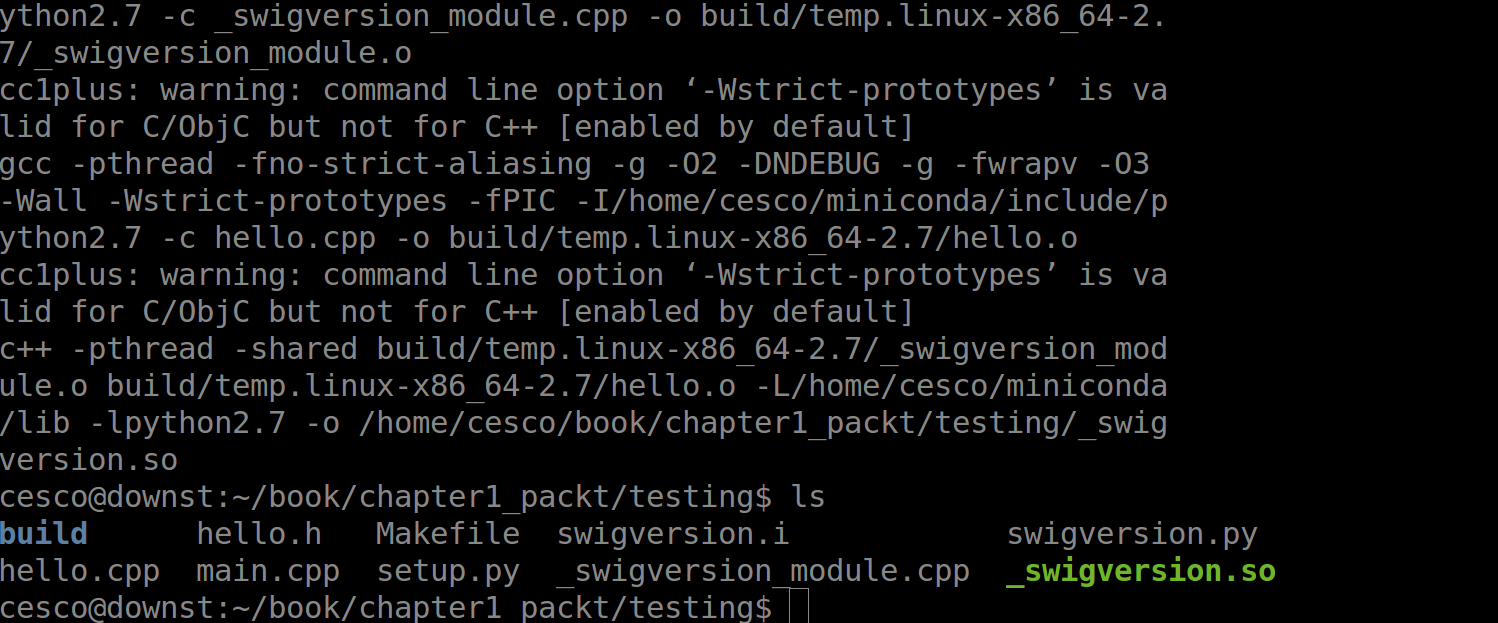

In [68]:
from IPython.display import Image
Image(filename='///home/cesco/Desktop/book_entirety/chapter1/images/B04209_01_07.png') 

The generated C++ source file contains the low-level wrappers that need to be compiled and linked with the rest of your C/C++ application to create an extension module. The Python swigversion.py source file contains high-level support code. This is the file that you will import to use the module. And finally the _swigversion.so is the generated shared object file.
Now we are ready to call our C/C++ from the generated Python module using a command-line command from inside the Python interpreter.  All we need to do is open an interpreter from our terminal by typing the following:


shell$ python
>>>import swigversion

and you will get the following expected output:

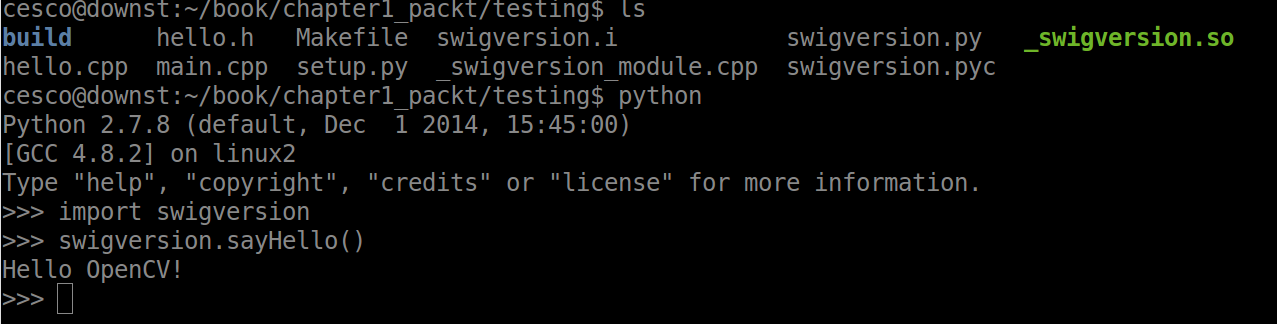

In [69]:
from IPython.display import Image
Image(filename='///home/cesco/Desktop/book_entirety/chapter1/images/B04209_01_08.png')

And by using this technique you can call code originally written in C/C++ and be able to call it using Python.  

As we can see through the use of our toy example,  Swig has its place as a code generator for many coding situations, but it also has its disadvantages. It is very good working with C code, but as the OpenCV library was ported from C code to a more modern C++ code full of modern constructs, templates, Swig's many deficiencies became apparent. It could not handle the new C++ code as well as it did with C  code. Other deficiencies included memory leaks, silent failures, and other hard to find bugs. For this and many reasons the change away from the Swig code generator has minimized bugs and has been welcomed
by many in the OpenCV community, because of its more flexible nature and its adaptation to C++.

## A look into modern OpenCV - Python

As the evolution was made from C to a more modern C++ based code, many changes were made. The Swig interfaces model was replaced with a modularity-based approach where you can import modules, and use all levels of the Python ecosystem in seamlessly fashion.  One of these is the open source extension module, NumPy.  It uses Python syntax, thus making it easy to embed code from low level languages. The module NumPy provides very fast pre-compiled functions for numerical routines, adding to Python support for large, multi-dimensional arrays and matrices. Numpy uses arrays instead of Python lists. The only caveat is that the number of elements in a NumPy array needs to be known when the array is created, and these arrays have to be of the same type. This adds great optimization to the code saving a lot of time when doing array calculations. For this reason the NumPy array is used by many other modules in the Python ecosystem.

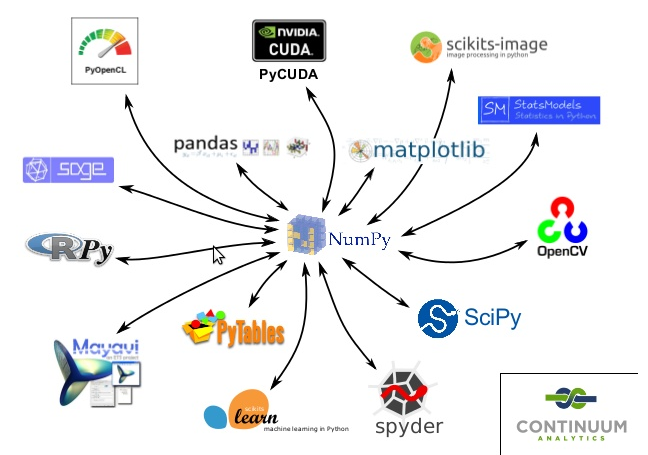

In [70]:
from IPython.display import Image
Image(filename='///home/cesco/Desktop/book_entirety/chapter1/images/B04209_01_09.png')